<h1 style="text-align: center;" markdown="1">Positional Encoding</h1>


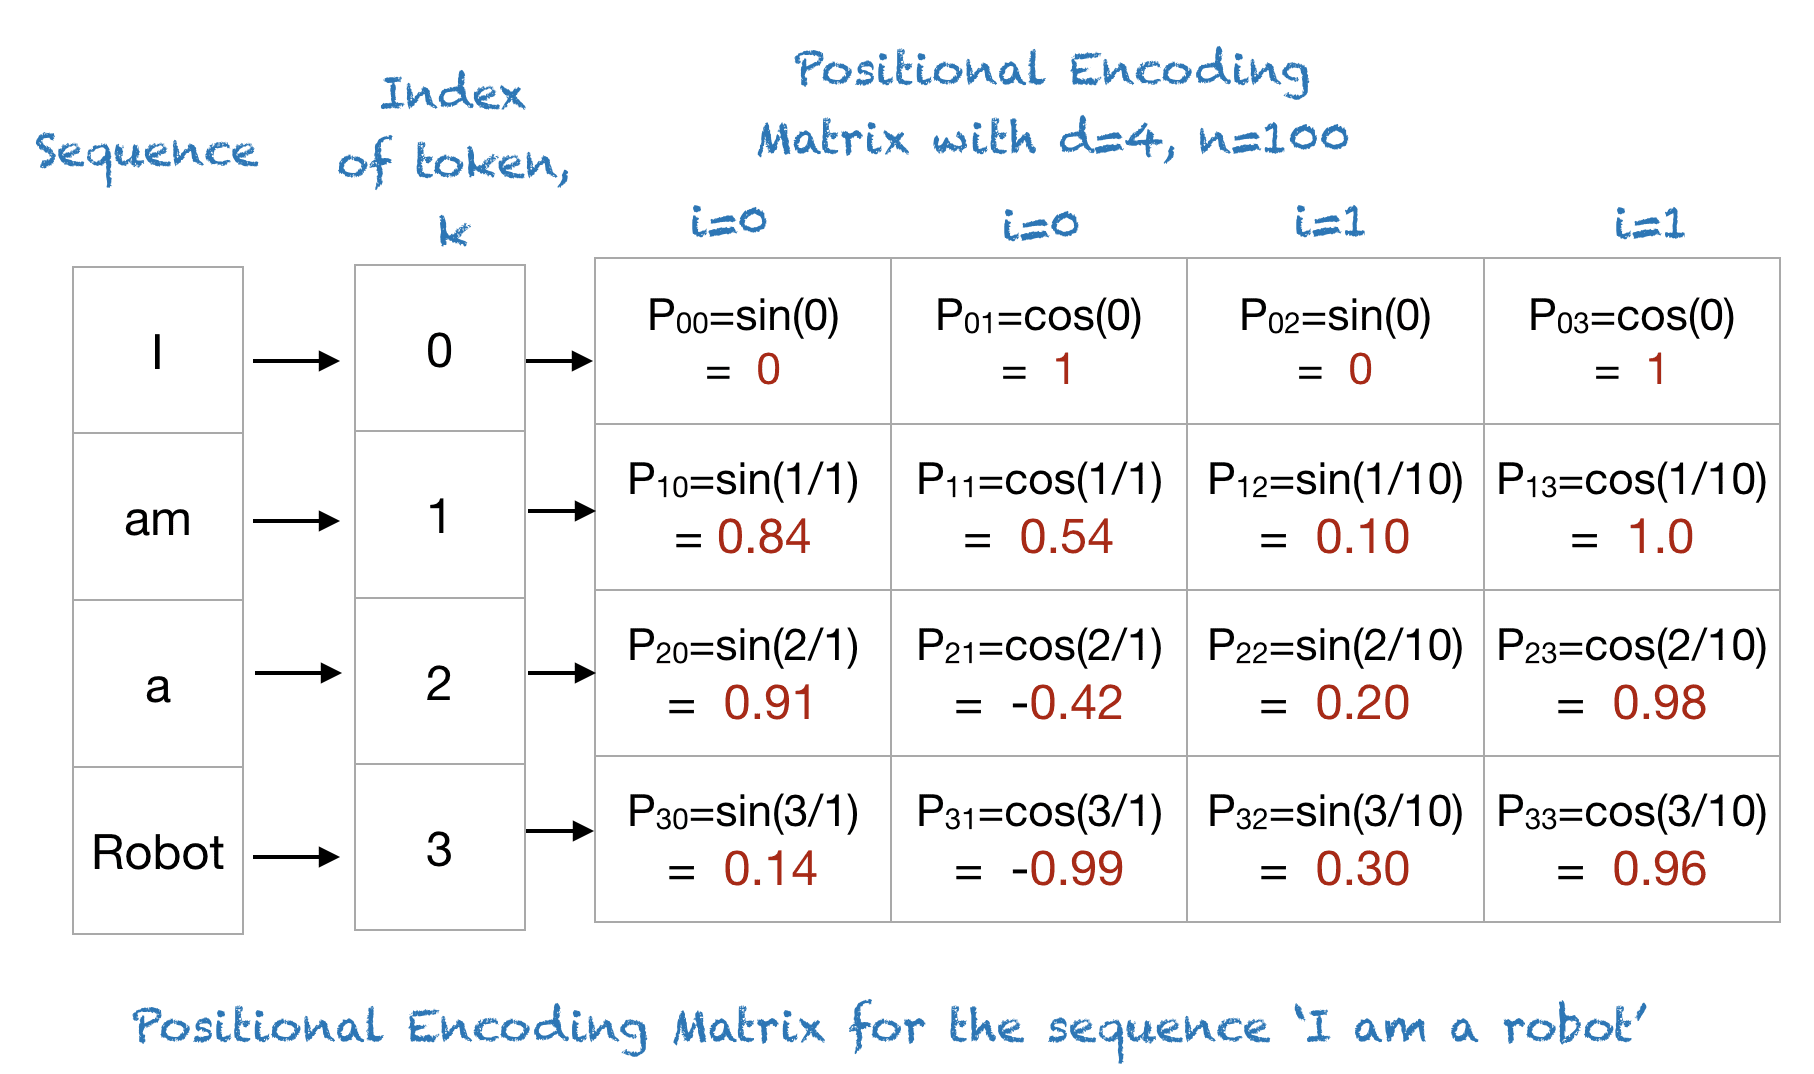

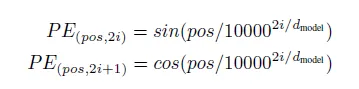

<!-- PE (position, 2i) = sin(position/ 10000^(2i/d_model))

PE (position, 2i+1) = cos(position/ 10000^(2i/d_model))

> Sin and Cos keep the positional value b/w -1 to 1
_____

it can be written as 

PE (position, i) = sin(position/ 10000^(i/d_model)) when i is even

PE (position, i) = cos(position/ 10000^(i-1/d_model)) when i is odd

_____

* i = dimension index
* d_model = Embedding length
* position = position of word in sequence -->

Positional Encoding (PE) formulas used in transformers are defined as follows:

For even indices:
$$ PE(\text{position}, 2i) = \sin\left(\frac{\text{position}}{10000^{2i/d_{\text{model}}}}\right) $$

For odd indices:
$$ PE(\text{position}, 2i+1) = \cos\left(\frac{\text{position}}{10000^{2i/d_{\text{model}}}}\right) $$

> Sin and Cos functions are used to keep the positional values between -1 and 1.

This can also be simplified and expressed as:

For even indices:
$$ PE(\text{position}, i) = \sin\left(\frac{\text{position}}{10000^{i/d_{\text{model}}}}\right) $$

For odd indices:
$$ PE(\text{position}, i) = \cos\left(\frac{\text{position}}{10000^{(i-1)/d_{\text{model}}}}\right) $$

___

**Notations:**
- i = Dimension index
- d_model = Embedding length
- position = Position of the word in the sequence


### New Formulation of Positional Encoding (PE)
The new approach simplifies the implementation of positional encoding in transformers by generalizing the formula for any index \(i\):

- **For even indices \(i\)**:
  - Use the sine function:
    $$ PE(\text{position}, i) = \sin\left(\frac{\text{position}}{10000^{i/d_{\text{model}}}}\right) $$

- **For odd indices \(i\)**:
  - Use the cosine function, adjusting the index to fit:
    $$ PE(\text{position}, i) = \cos\left(\frac{\text{position}}{10000^{(i-1)/d_{\text{model}}}}\right) $$

**Explanation**:
- **Even Indices (\(i = 2k\) for some \(k\))**: The index \(i\) is even, thus directly applicable to the sine function with the base and exponent consistent with the original even-indexed formulation.
- **Odd Indices (\(i = 2k+1\) for some \(k\))**: By using \(i-1\) (which is even) in the cosine function, it aligns with the sequence of alternating sine and cosine across the dimensions. This maintains the integrity of positional encoding as alternating between sine and cosine.

This unified approach is efficient for implementation, allowing a straightforward calculation of all positional encodings using a single formula with conditional checks based on the parity of the index \(i\).


In [1]:
import torch
import torch.nn as nn
max_seq_len = 10 # Length of input sequence
d_model=6 # dimension of each input vectors

In [2]:
even_i = torch.arange(0, d_model, 2).float()  # even dimension
even_i

tensor([0., 2., 4.])

In [3]:
odd_i = torch.arange(1, d_model, 2).float() # odd  dimensions
odd_i

tensor([1., 3., 5.])

In [4]:
even_denominator = torch.pow(10000, even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [5]:
odd_denominator = torch.pow(10000 , (odd_i -1)/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

Since, even & odd denominator are both same, we can use one of these.

In [6]:
denominator = even_denominator

In [7]:
position = torch.arange( max_seq_len, dtype=torch.float).reshape(max_seq_len,1) # position of each element in the sequence
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [8]:
even_PE = torch.sin(position/denominator)
odd_PE = torch.cos(position/denominator)

In [9]:
even_PE # for even positions

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [10]:
odd_PE # for odd position

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

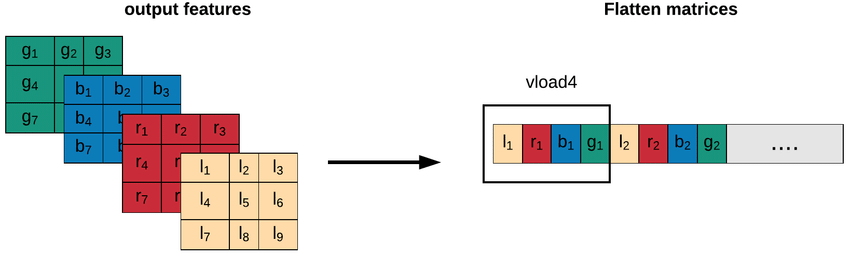

In [11]:
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [12]:
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [13]:
PE = torch.flatten(stacked, start_dim=1 , end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

## Class

In [14]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_seq_len):
        super().__init__()
        self.max_seq_len = max_seq_len
        self.d_model=d_model

    def forward(self):
        even_i = torch.arange(0 , self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_seq_len).reshape(self.max_seq_len, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position/denominator)
        stacked = torch.stack([even_PE, odd_PE], dim =2)
        PE=torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [15]:
pe = PositionalEncoding(d_model=6, max_seq_len=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])